

# Project: Investigate a Dataset (Medical Appointment No shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>A person makes a doctor appointment, receives all the instructions and no-show. Who is to blame? 
In this Notebook we are going to analyze 110.527 medical appointments and their 14 associated variables for the factors affecting the no-show rates for doctor appointments.

>After inspecting and cleaning the data, we will analyze the factors affecting no-show rates based on whether they are inherent factors that can't be mended like patient's age and health conidtions, or external factors that can be changed to improve appointments show rates like the place of the appointment, its timing, if the patient received an SMS for his appointment or not and if the patient is receiving scholarship (welfare).


#### Importing the needed libraries for data analysis and visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Importing the data to a dataframe and exploring columns

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.describe(include=('O'))

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


#### Checking for Nan values in the dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>**No Nan values found**

#### Checking columns for any missing or error values

In [6]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

>**In the _'Age'_ column, there is an invalid entry (-1) which needs to be removed during data cleaning**

In [7]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [8]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [9]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [10]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [11]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [12]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [13]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

#### Editing the _ScheduledDay_ and _AppointmentDay_ columns to remove irrelevant data and compare between them:

In [14]:
df.ScheduledDay=df.ScheduledDay.str[:10]

In [15]:
df.AppointmentDay=df.AppointmentDay.str[:10]

In [16]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Converting both columns to date values instead of strings to compare between the two dates

In [17]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ScheduledDay, dtype: datetime64[ns]

In [18]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

>**Now, we will create the 'Time_diff' column which is the difference (in days ) between the scheduling date and the appointment date**

In [19]:
df['Time_diff']=(df['AppointmentDay'] - df['ScheduledDay']).dt.days

#### Checking the values in Time_diff column for any invalid values to be removed before analysis

In [20]:
df.Time_diff.value_counts().sort_index()

-6          1
-1          4
 0      38563
 1       5213
 2       6725
 3       2737
 4       5290
 5       3277
 6       4037
 7       4906
 8       2332
 9       1605
 10      1391
 11       987
 12      1115
 13      1682
 14      2913
 15      1503
 16      1151
 17      1107
 18      1021
 19      1044
 20      1187
 21      1861
 22      1173
 23       822
 24       622
 25       637
 26       731
 27      1013
        ...  
 101        1
 102        4
 103        5
 104        8
 105        4
 107        2
 108        5
 109        5
 110        2
 111        5
 112        5
 115        2
 117        1
 119        4
 122        3
 123        1
 125        1
 126        1
 127        1
 132        1
 133       11
 139        1
 142        8
 146        1
 151        1
 155       10
 162       11
 169        8
 176       16
 179       10
Name: Time_diff, Length: 131, dtype: int64

>**We have 2 negative values (-1, -6) which we need to remove their entries as they are errors (appointment date can't be before the scheduling date)**

In [21]:
df.Time_diff.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Time_diff, dtype: float64

#### Replacing values in the _No-show_ column with integers instead of strings to aid in our analysis and visualization, and renaming the column to a more convenient name based on the new values

In [22]:
df['No-show'].replace({"Yes":"0","No":"1"}, inplace=True)

In [23]:
df.rename(columns={'No-show':'Appointment_show'}, inplace=True)

In [24]:
df['Appointment_show'] = df['Appointment_show'].astype(int)

### Data Cleaning (removing wrong entries and unnecessary data columns)

#### Removing the _'PatientId'_ and _'AppointmentID'_ columns from the dataset as they have no relevance in our analysis

In [25]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#### Removing the invalid entries mentioned earlier

In [26]:
df=df[df.Age != -1]

In [27]:
df = df[df.Time_diff != -1]

In [28]:
df = df[df.Time_diff != -6]

#### Testing for invalid entries

In [29]:
df.query('Age == -1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment_show,Time_diff


#### Removing 'ScheduledDay' and 'AppointmentDay' columns as they are no longer needed and 'Time_diff' column will be used instead

In [30]:
df.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

#### After cleaning, this our current dataset that will be used in the analysis

In [31]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment_show,Time_diff
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


#### Exploring trends among the data for the exploratory phase

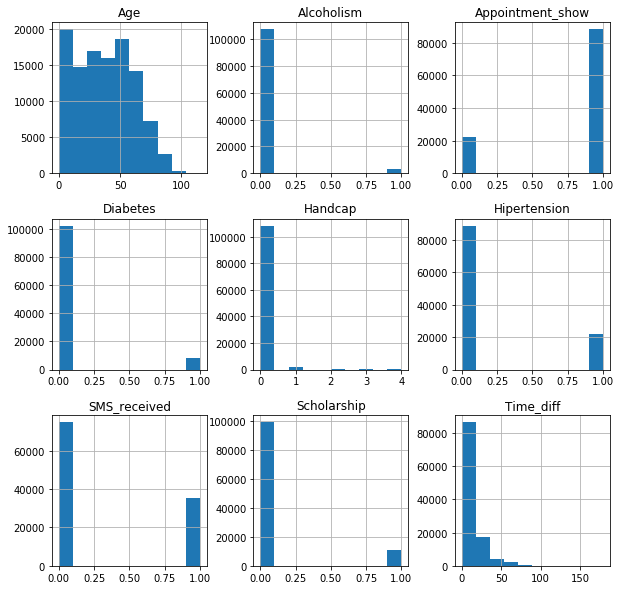

In [32]:
df.hist(figsize=(10,10));

<a id='eda'></a>
## Exploratory Data Analysis

> **In this section, we are going to analyze the data to explore which factors cause patients to not show to their doctor appointments. We will start with the inherent factors (Age and illness), then we will look into external factors (The place where the appointment takes place, time from scheduling the appointment, if the patient received scholarship and whether or not the patient received an SMS for his appointment).**


### Research Question 1 - Does the age of the patients affect their show rates?

#### We are going to get the proportion of patients of each age who showed up for their appointments by dividing the total number of patients of that age by the number of appointment hsow patients, then plotting it against the different ages to determine if there is a relation between age of patients and show rates:

##### Total patient count per age:

In [33]:
Age_counts=df.Age.value_counts().sort_index()

##### Total patient count who showed up for their appointments per age:

In [34]:
Age_show=df.groupby('Age').sum()['Appointment_show']

##### 'Age percent' will represent patient proportion that showed up for their appointments per age, and we will plot it against different ages along with a median line to show variations:

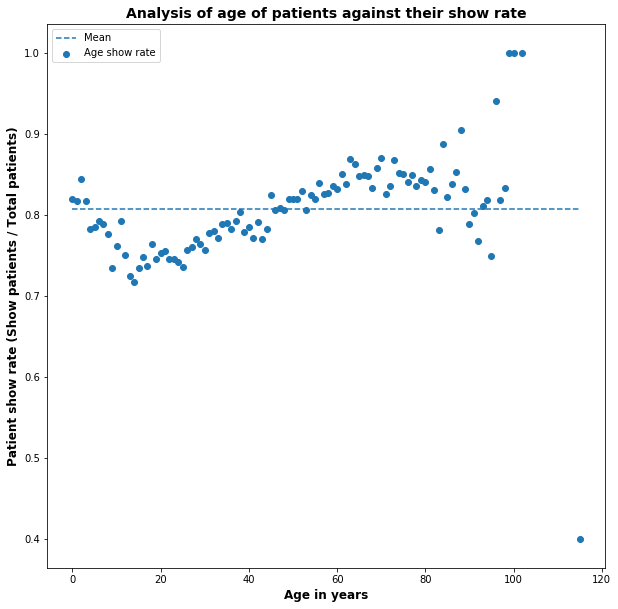

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [61]:
Age_percent = Age_show / Age_counts
fig, ax=plt.subplots(figsize=(10,10))
rects1=ax.scatter(np.sort(df.Age.unique()), Age_percent, label='Age show rate')
rects2=ax.plot(np.sort(df.Age.unique()), [np.mean(Age_percent)]*len(df.Age.unique()), label='Mean', linestyle='--')
ax.set_title('Analysis of age of patients against their show rate', fontdict={'fontsize': 14, 'fontweight': 'heavy'})
ax.set_xlabel('Age in years', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_ylabel('Patient show rate (Show patients / Total patients)', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
plt.legend()
plt.show()
fig.tight_layout()
df.Age.describe()

>**From the above graph, we can see that Appointment show rates are different across different ages, with _young people (Age 8:35)_ having slightly lower appointment show rates, and _geriatrics (Age>60)_ having slightly higher show rates**

### Research Question 2 - Are chronically-ill patients less or more likely to show for their appointments?

#### Here we will compare patients' different disease states against their show rates by getting total patient count for each disease state and plotting it as a barchart alongside the number of patients who showed for their appointment for each disease (Hypertension, Diabetes and Alcoholism).

##### Total number of patients having hypertension:

In [36]:
Hypertension_count=df.Hipertension.value_counts().sort_index()
Hypertension_count

0    88720
1    21801
Name: Hipertension, dtype: int64

##### Total number of patients having hypertension and showed up for their appointments:

In [37]:
Hypertension_show=df.groupby('Hipertension').sum()['Appointment_show']
Hypertension_show

Hipertension
0    70178
1    18029
Name: Appointment_show, dtype: int64

##### Total number of patients having diabetes:

In [38]:
Diabetes_count=df.Diabetes.value_counts().sort_index()
Diabetes_count

0    102578
1      7943
Name: Diabetes, dtype: int64

##### Total number of patients having diabetes and showed up for their appointments:

In [39]:
Diabetes_show=df.groupby('Diabetes').sum()['Appointment_show']
Diabetes_show

Diabetes
0    81694
1     6513
Name: Appointment_show, dtype: int64

##### Total number of alcoholic patients:

In [40]:
Alcoholism_count=df.Alcoholism.value_counts().sort_index()
Alcoholism_count

0    107161
1      3360
Name: Alcoholism, dtype: int64

##### Total number of alcoholic patients and showed up for their appointments:

In [41]:
Alcoholism_show=df.groupby('Alcoholism').sum()['Appointment_show']
Alcoholism_show

Alcoholism
0    85524
1     2683
Name: Appointment_show, dtype: int64

##### Now, we will plot a barchart with bars for the total patient count of each diease state next to bars for the number of patients who showed up for their appointments and having the same health issue, and we will compare them with bars for healthy individuals and their show rate:

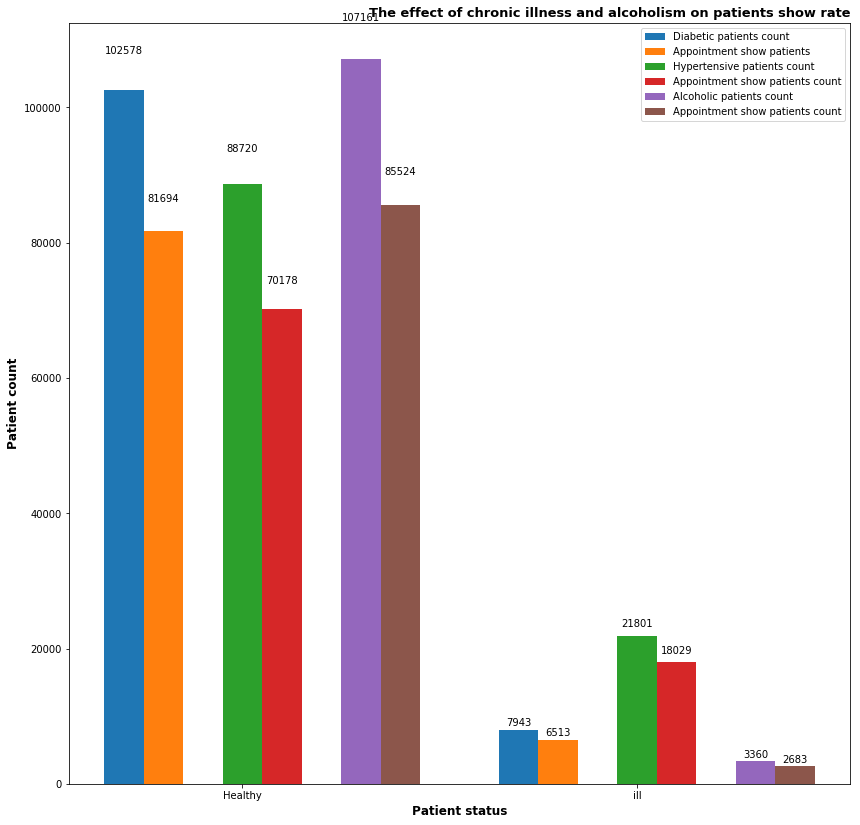

Appointment_show
Diabetes Appointment_show                  
0        0                            20884
         1                            81694
1        0                             1430
         1                             6513

In [42]:
labels=['Healthy', 'ill']
x=np.arange(len(labels))
fig, ax=plt.subplots(figsize=(14,14))
rects1=ax.bar(x, Diabetes_count, width=0.1, label='Diabetic patients count')
rects2=ax.bar(x+0.1, Diabetes_show, width=0.1, label='Appointment show patients')
rects3=ax.bar(x+0.3, Hypertension_count, width=0.1, label='Hypertensive patients count')
rects4=ax.bar(x+0.4, Hypertension_show, width=0.1, label='Appointment show patients count')
rects5=ax.bar(x+0.6, Alcoholism_count, width=0.1, label='Alcoholic patients count')
rects6=ax.bar(x+0.7, Alcoholism_show, width=0.1, label='Appointment show patients count')
ax.set_title('The effect of chronic illness and alcoholism on patients show rate', fontdict={'fontsize': 13, 'fontweight': 'heavy'}, loc='right')
ax.set_xlabel('Patient status', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_ylabel('Patient count', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_xticks(x + 0.6 / 2)
ax.set_xticklabels(labels)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
plt.legend()
plt.show()
fig.tight_layout()
df.groupby(['Diabetes', 'Appointment_show'])[['Appointment_show']].count()

##### Illustrating the results in a numerical form which shows the numbers of patient showing (1) and not showing (0) for their appointments and whether they have the disease (1) or not (0):

In [43]:
df.groupby(['Hipertension', 'Appointment_show'])[['Appointment_show']].count()

Appointment_show
Hipertension Appointment_show                  
0            0                            18542
             1                            70178
1            0                             3772
             1                            18029

In [44]:
df.groupby(['Alcoholism', 'Appointment_show'])[['Appointment_show']].count()

Appointment_show
Alcoholism Appointment_show                  
0          0                            21637
           1                            85524
1          0                              677
           1                             2683

>**From the above analysis, patients with a chronic illness such as diabetes or hypertension, or alcoholic patients are more likely to show for their appointments than healthier individuals.**

#### Analysing the effect of handicap on patients show rate by the same method as we did in the chronic diease conditions, compare show rates for healthy and handicapped patients

##### Total handicapped patients count for every handicap:

In [45]:
Handcap_count=df.Handcap.value_counts().sort_index()
Handcap_count

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

##### Appointment show numbers for every handicap:

In [46]:
Handcap_show=df.groupby('Handcap').sum()['Appointment_show']
Handcap_show

Handcap
0    86373
1     1676
2      146
3       10
4        2
Name: Appointment_show, dtype: int64

##### Plotting a bargraph to compare show rates among different handicaps

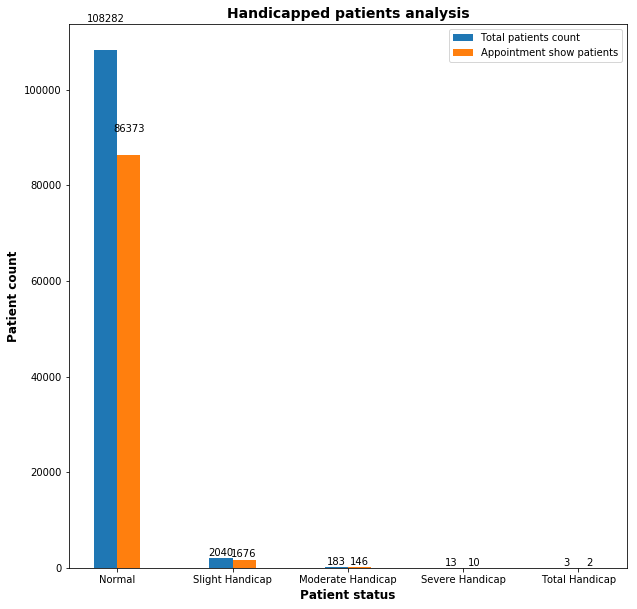

Appointment_show
Handcap Appointment_show                  
0       0                            21909
        1                            86373
1       0                              364
        1                             1676
2       0                               37
        1                              146
3       0                                3
        1                               10
4       0                                1
        1                                2

In [47]:
labels=['Normal', 'Slight Handicap', 'Moderate Handicap', 'Severe Handicap', 'Total Handicap']
x=np.arange(len(labels))
fig, ax=plt.subplots(figsize=(10,10))
rects1=ax.bar(x, Handcap_count, width=0.2, label='Total patients count')
rects2=ax.bar(x+0.2, Handcap_show, width=0.2, label='Appointment show patients')
ax.set_title('Handicapped patients analysis', fontdict={'fontsize': 14, 'fontweight': 'heavy'})
ax.set_xlabel('Patient status', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_ylabel('Patient count', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_xticks(x + 0.2 / 2)
ax.set_xticklabels(labels)
autolabel(rects1)
autolabel(rects2)
plt.legend()
plt.show()
fig.tight_layout()
df.groupby(['Handcap', 'Appointment_show'])[['Appointment_show']].count()

>**From the above analysis, handicapped patients appear to have the same appointment show rates as healthy ones**

### Research Question 3 - Do some neighbourhoods have better show rates than the others? If the appointment is in a certain neighbourhood, patients will be more likely to show for their appointment?

#### To answer this question, we will have to get the number of patients showing up for their appointments for each neighbourhood to compare it against the total number of appointments made in the neighbourhood. 
#### We can do this by subtracting the number of no_show patients in each neighbourhood from the total number of patients who had appointments in that neighbourhood.

In [48]:
difference_nei = df.Neighbourhood.value_counts().sort_index() - df.query('Appointment_show == 0').Neighbourhood.value_counts().sort_index()
difference_nei

AEROPORTO                 7.0
ANDORINHAS             1741.0
ANTÔNIO HONÓRIO         221.0
ARIOVALDO FAVALESSA     220.0
BARRO VERMELHO          332.0
BELA VISTA             1523.0
BENTO FERREIRA          665.0
BOA VISTA               254.0
BONFIM                 2223.0
CARATOÍRA              1974.0
CENTRO                 2631.0
COMDUSA                 254.0
CONQUISTA               689.0
CONSOLAÇÃO             1139.0
CRUZAMENTO             1094.0
DA PENHA               1788.0
DE LOURDES              258.0
DO CABRAL               472.0
DO MOSCOSO              321.0
DO QUADRO               709.0
ENSEADA DO SUÁ          183.0
ESTRELINHA              432.0
FONTE GRANDE            533.0
FORTE SÃO JOÃO         1543.0
FRADINHOS               210.0
GOIABEIRAS              563.0
GRANDE VITÓRIA          854.0
GURIGICA               1562.0
HORTO                   133.0
ILHA DAS CAIEIRAS       836.0
                        ...  
PARQUE INDUSTRIAL         NaN
PARQUE MOSCOSO          623.0
PIEDADE   

##### We notice that the new dataset contains only 80 entries while the neighbourhoods index contains 81, this is due to null values for one nieghbourhood, so we will fill any null values with zeroes to be able to plot it with the same dimensions as the neighbourhoods index on a graph.

In [49]:
difference_nei = difference_nei.fillna(0).astype(int)

##### Plotting the number of patients showing up for their appointments against the total patient number in each neighbourhood:

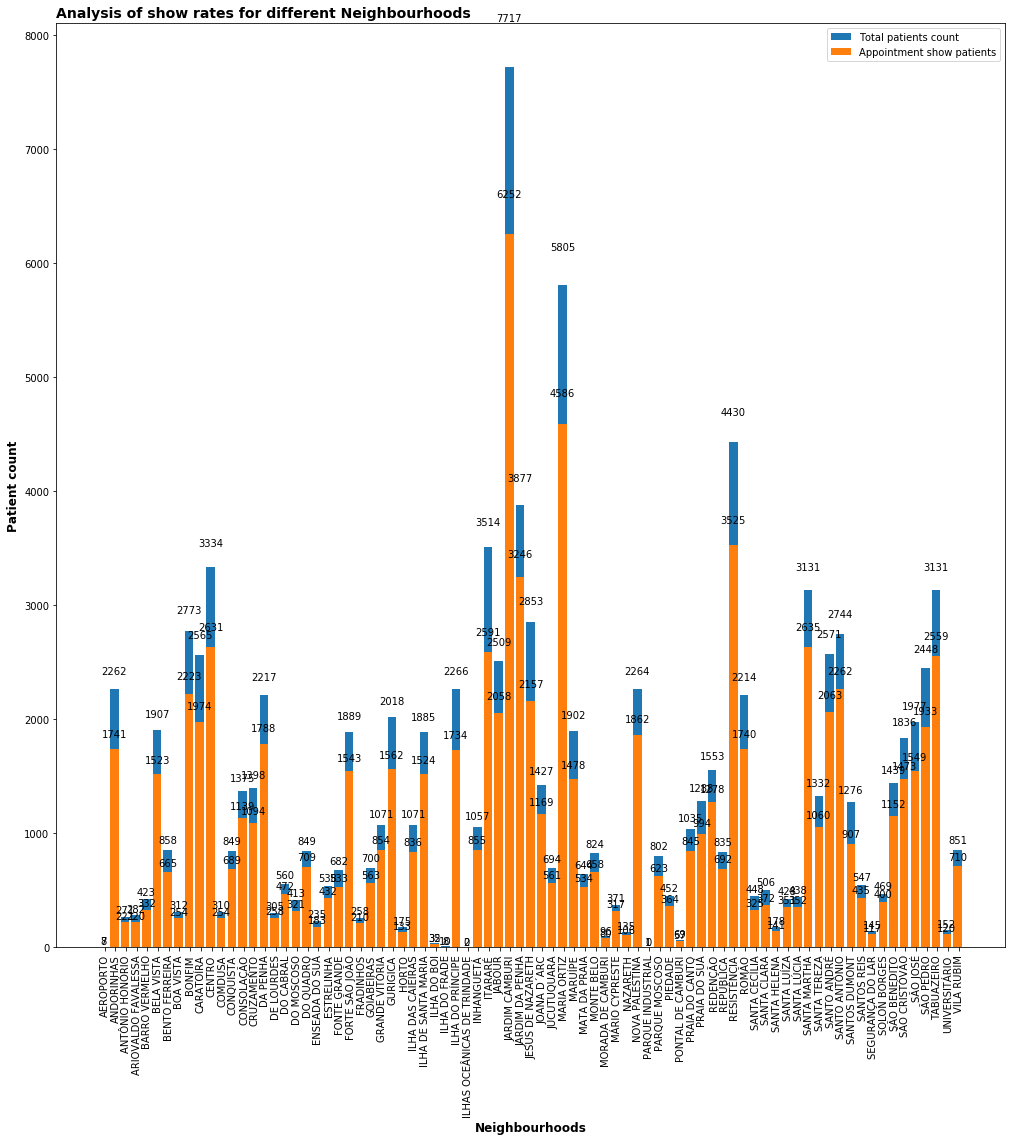

In [50]:
labels=np.sort(df.Neighbourhood.unique())
x=np.arange(len(labels))
fig, ax=plt.subplots(figsize=(17,17))
rects1=ax.bar(x, df.Neighbourhood.value_counts().sort_index(), label='Total patients count')
rects2=ax.bar(x, difference_nei, label='Appointment show patients')
ax.set_title('Analysis of show rates for different Neighbourhoods', fontdict={'fontsize': 14, 'fontweight': 'heavy'}, loc='left')
ax.set_xlabel('Neighbourhoods', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_ylabel('Patient count', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_xticks(x + 0.2 / 2)
ax.set_xticklabels(labels)
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=90)
plt.legend()
plt.show()
fig.tight_layout()

>**From the above figure, neighbourhoods have similar show rates with slight variations in some of them.**

### Research Question 4 - Are the patients getting scholarships (welfare) more likely to show for their appointments or not?

#### To answer this question, we will compare the show rate of patients with scholarships against those who didn't receive scholarships (welfare).

##### Getting the total number of patients who showed for their appointments:

In [51]:
df.query('Appointment_show == 1').Scholarship.value_counts().sort_index()

0    79924
1     8283
Name: Scholarship, dtype: int64

##### Getting the total number of patients who didn't show for their appointments:

In [52]:
df.query('Appointment_show == 0').Scholarship.value_counts().sort_index()

0    19736
1     2578
Name: Scholarship, dtype: int64

##### Plotting the previously obtained numbers as barplot to compare show rates:

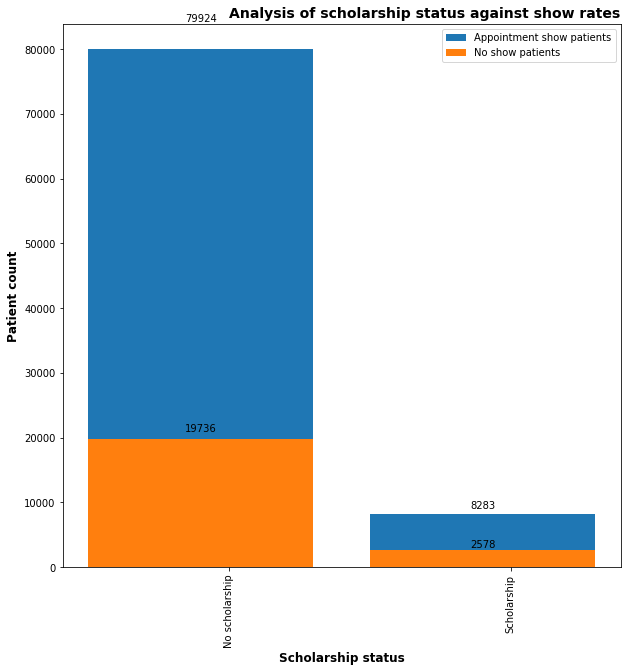

Appointment_show
Scholarship Appointment_show                  
0           0                            19736
            1                            79924
1           0                             2578
            1                             8283

In [53]:
labels=['No scholarship', 'Scholarship']
x=np.arange(len(labels))
fig, ax=plt.subplots(figsize=(10,10))
rects1=ax.bar(x, df.query('Appointment_show == 1').Scholarship.value_counts().sort_index(), label='Appointment show patients')
rects2=ax.bar(x, df.query('Appointment_show == 0').Scholarship.value_counts().sort_index(), label='No show patients')
ax.set_title('Analysis of scholarship status against show rates', fontdict={'fontsize': 14, 'fontweight': 'heavy'}, loc='right')
ax.set_xlabel('Scholarship status', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_ylabel('Patient count', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_xticks(x + 0.2 / 2)
ax.set_xticklabels(labels)
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=90)
plt.legend()
plt.show()
fig.tight_layout()
df.groupby(['Scholarship', 'Appointment_show'])[['Appointment_show']].count()

>**From the above graph, patients receiving scholarships (welfare) are slighlty more likely to show for their medical appointments.**

### Research Question 5 - Does scheduling the appointment more early or more closer to the actual appointment date affects the show rates?

#### Here we will be getting the ratio (fraction) of patients who showed for their appointments from the total patient count for the time period of scheduling.
#### To get it we will divide the number of patients who showed for their appointments by the total patient count for each time period

##### The number of patients who showed for their appointments in each time period:

In [54]:
difference_time = df.query('Appointment_show == 1').Time_diff.value_counts().sort_index() / df.Time_diff.value_counts().sort_index()
difference_time

0      0.953529
1      0.786495
2      0.761784
3      0.764706
4      0.767297
5      0.733903
6      0.752044
7      0.733184
8      0.712693
9      0.725857
10     0.683681
11     0.683891
12     0.683408
13     0.681332
14     0.686577
15     0.666001
16     0.695048
17     0.683830
18     0.694417
19     0.652299
20     0.656276
21     0.691026
22     0.655584
23     0.664234
24     0.622186
25     0.598116
26     0.640219
27     0.684107
28     0.705158
29     0.673095
         ...   
101    1.000000
102    0.750000
103    0.400000
104    0.250000
105    1.000000
107    1.000000
108    1.000000
109    1.000000
110    0.500000
111    0.800000
112    1.000000
115    1.000000
117    1.000000
119    1.000000
122    1.000000
123    1.000000
125    1.000000
126         NaN
127    1.000000
132         NaN
133    0.636364
139         NaN
142    0.625000
146         NaN
151         NaN
155    0.400000
162    0.818182
169    0.875000
176    0.625000
179    0.800000
Name: Time_diff, Length:

#### Here we got a set with null values because the appointment show set had only124 entries while the Time_diff set length is 129, so there must have been some time periods when no patients showed for their appointments, and we will correct them to zeroes to be able to plot the values on a graph.

In [55]:
len(df.Time_diff.value_counts().sort_index())

129

In [56]:
difference_time = difference_time.fillna(0)

##### Plotting a scatterplot of the show rates for different time periods, with a median line to be able to observe the variations in show rates along the graph:

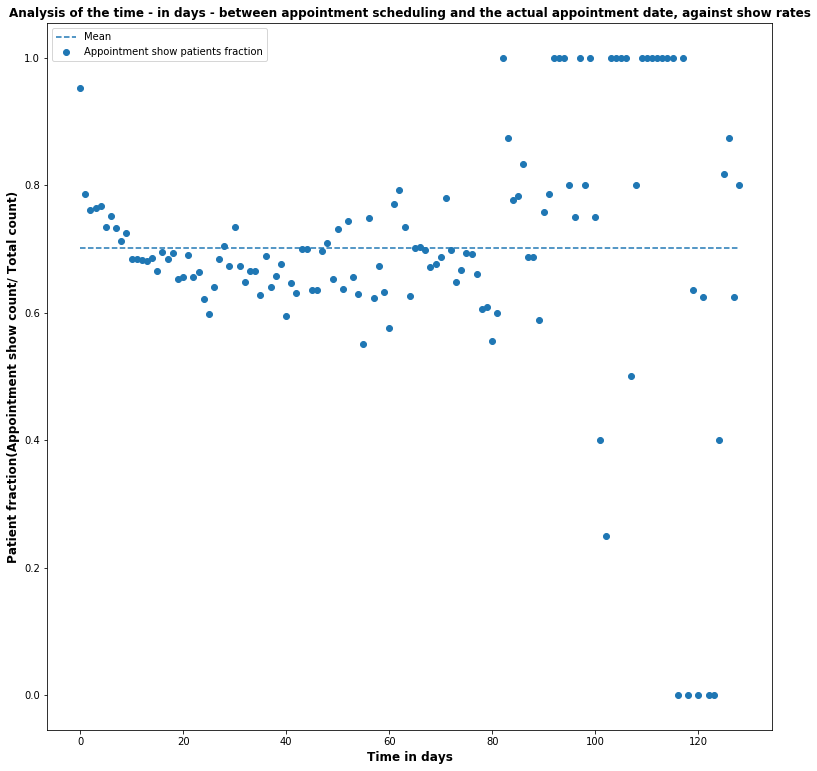

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Time_diff, dtype: float64

In [57]:
labels=np.sort(df.Time_diff.unique())
x=np.arange(len(labels))
fig, ax=plt.subplots(figsize=(13,13))
rects1=ax.scatter(x, difference_time, label='Appointment show patients fraction')
rects2=ax.plot(x, [np.mean(difference_time)]*len(df.Time_diff.unique()), label='Mean', linestyle='--')
ax.set_title('Analysis of the time - in days - between appointment scheduling and the actual appointment date, against show rates', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_xlabel('Time in days', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_ylabel('Patient fraction(Appointment show count/ Total count)', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
#ax.set_xticks(x + 0.2 / 2)
#ax.set_xticklabels(labels)
#plt.xticks(rotation=90)
plt.legend()
plt.show()
fig.tight_layout()
df.Time_diff.describe()

>**From the above analysis, we can see that appointment show rates are higher when the appointment is scheduled in the same day, and decrease as the scheduling date gets further from the appoitnment date, with exceptions showing high show rates when it's scheduled at least 3 months in advance**

### Research Question 6 - Did the patients who received an SMS for their appointments where more likely to show for their appointments?

#### To answer this question, we will compare the show rate of patients who received an SMS against those who didn't.

##### Getting the total number of patients who showed for their appointments:

In [58]:
df.query('Appointment_show == 1').SMS_received.value_counts().sort_index()

0    62509
1    25698
Name: SMS_received, dtype: int64

##### Getting the total number of patients who didn't show for their appointments:

In [59]:
df.query('Appointment_show == 0').SMS_received.value_counts().sort_index()

0    12530
1     9784
Name: SMS_received, dtype: int64

##### Plotting the previously obtained numbers as barplot to compare show rates:

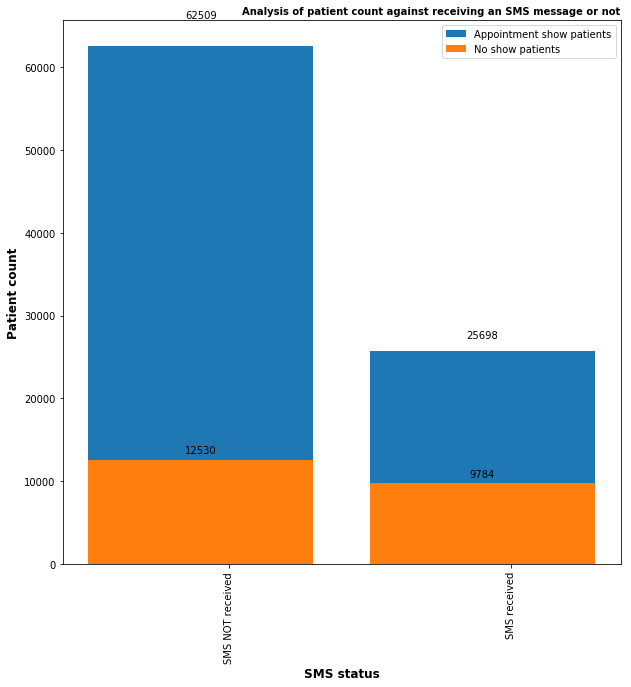

Appointment_show
SMS_received Appointment_show                  
0            0                            12530
             1                            62509
1            0                             9784
             1                            25698

In [60]:
labels=['SMS NOT received', 'SMS received']
x=np.arange(len(labels))
fig, ax=plt.subplots(figsize=(10,10))
rects1=ax.bar(x, df.query('Appointment_show == 1').SMS_received.value_counts().sort_index(), label='Appointment show patients')
rects2=ax.bar(x, df.query('Appointment_show == 0').SMS_received.value_counts().sort_index(), label='No show patients')
ax.set_title('Analysis of patient count against receiving an SMS message or not', fontdict={'fontsize': 10, 'fontweight': 'heavy'}, loc='right')
ax.set_xlabel('SMS status', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_ylabel('Patient count', fontdict={'fontsize': 12, 'fontweight': 'heavy'})
ax.set_xticks(x + 0.2 / 2)
ax.set_xticklabels(labels)
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=90)
plt.legend()
plt.show()
fig.tight_layout()
df.groupby(['SMS_received', 'Appointment_show'])[['Appointment_show']].count()

>**From the above figures, people who received an SMS were more likely NOT to show for their appointments, suggesting that the messages were probably sent with wrong appointment dates**

<a id='conclusions'></a>
## Conclusions

> In summary, there were some inherent factors that affected patients' show rates like the patient age and diesease state (hypertension, diabetes, alcoholism), and other external factors like the place (neighbourhood) of the appointment, the date from scheduling the appointment and sending an SMS message to the patient.

>It is observed that patients with chronic ilness or alcoholic patients were more keen on showing for their appointments, probably to follow up with their conditions and receive their chronic medications.
The same applied to geriatric patients which showed higher show rates for their appointments, reflecting that they probably are more concerned abouth their health than young individuals whose show rates were below average.

>Of course, some of the factors have differences that aren't statistically significant so they their effect on the appointment show rates can be considered negligible, and we have to focus on the factor with the highest statistical significance **_(causing the largest difference in show rates)._**

>**To answer the question 'Who is to blame?'**, the most influencing factor (with the greatest variation in show rates) and at the same time was an external factor not related to the patients' health or age was **_sending an SMS message_**, where 38% of the patients who received the SMS didn't show for their appointments compared to only 19% in case of not receiving a message, suggesting that the messages are sent with the wrong appointment dates to the patients.
>Here, this factor alone doubled the no_show rates of patients so this is the most statiscally significant factor in the analysis, which if altered (fixed) will have a measurable impact on improving the show rates.

>Other factors to be considered for improving the patient show rate is the **_time of scheduling the appointments_**, where it is better to schedule the appointments **on the same day**, which had about **95% show rate**, with a significant difference between it and other scheduling periods which had between **60& and 80% show rates.**

>The analysis is limited by the data available. The available sample size for analysis was 110527 entries with no missing values for all the associated variables, which can be a good representative of the population and we can rely on its results for statistical analysis.

>Among the limitations of the analysis also is the unmentioned data which could have affected the analysis results fo certain factors such as information about the different neighbourhoods(how many health facility are available in each one, which of them is rural and which is urban), other co-morbidities the patients suffered from which could have affected their show rates.